# Graphs


- bajo vs alto nivel
  - ventajas
  - desventajas
- marcas
- canales
- gramatica 
- graficas
  - histogramas
  - bar plots
  - line plots
  - box plots
  - heatmap

## High level vs Low level API

Basically, if we use a **High Level** interface, we need to write less code, means it's faster, but we have less control about how the graph is produced. On the flip side, in a **Low Level** interface we need to declare more but we have total control in every graph element.

Look at this example using JS (yes, JS) libraries:

![interfaces](../img/interfaces.png)

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

Let's create a quick plot using the COVID dataset we have in the repo

In [2]:
data = pd.read_csv("../data/owid-covid-data.csv")

In [4]:
data

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
212633      ZWE    Africa     Zimbabwe  2022-08-25     256675.0       47.0   
212634      ZWE    Africa     Zimbabwe  2022-08-26     256682.0        7.0   
212635      ZWE    Africa     Zimbabwe  2022-08-27     256682.0        0.0   
212636      ZWE    Africa     Zimbabwe  2022-08-28     256699.0       17.0   
212637      ZWE    Africa     Zimbabwe  2022-08-29     256704.0        5.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
212633              13.714        5593.0         1.0                0.571   
212634              12.286        5593.0         0.0                0.571   
212635               9.429        5593.0         0.0                0.143   
212636              10.714        5593.0         0.0                0.143   
212637              10.857        5593.0         0.0                0.143   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
212633  ...             1.6          30.7                  36.791   
212634  ...             1.6          30.7                  36.791   
212635  ...             1.6          30.7                  36.791   
212636  ...             1.6          30.7                  36.791   
212637  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
212633                         1.7            61.49                    0.571   
212634                         1.7            61.49                    0.571   
212635                         1.7            61.49                    0.571   
212636                         1.7            61.49                    0.571   
212637                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

Let's filter just one country for sake of time.

In [15]:
mx_data = data[ data["location"] == 'Mexico']

If we use **matplotlib** we can create a plot very fast

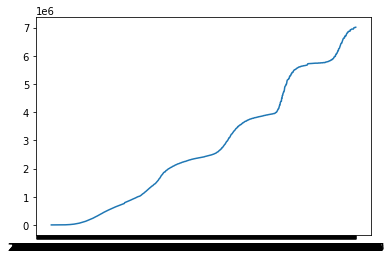

In [16]:
plt.plot(mx_data["date"],mx_data["total_cases"])
plt.show()

In **Seaborn** we need to declare a little bit more

<AxesSubplot:xlabel='date', ylabel='total_cases'>

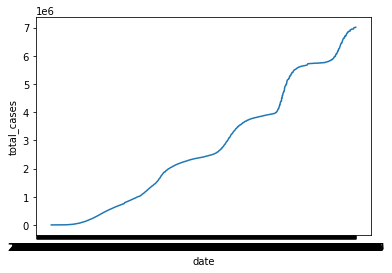

In [19]:
sns.lineplot(
data = mx_data,
x = "date",
y = "total_cases")

But in **Altair** we need to declare **MARKS** and **ENCODINGS** to have the same simple plot. Why???

In [29]:
alt.Chart(
        mx_data,
        width = 400
    ).mark_line(
        color='red',
    ).encode(
        x='date',
        y='total_cases'
)

alt.Chart(...)

The answer lies in the **Grammar of Graphics**

## Grammar or Graphics

**"Applied to visualizations, a grammar of graphics is a grammar used to describe and create a wide range of statistical graphics."**

*Wilkinson, Leland. (2005). The Grammar of Graphics.*

The components of the Layered Grammar of Graphs are:
    
- Layer
    - Data
    - Mapping
    - Statistical transformation (stat)
    - **Geometric object (geom)**
    - **Position adjustment (position)**
- Scale
- Coordinate system (coord)
- Faceting (facet)


Let's concentrate just in two aspects: **geoms (mark)** and **position (channel)**

### Marks

**Marks are basic geometric elements that depict items**

Marks are geometric primitives classified according to the number of dimensions they require. 

Examples: points (0D), lines (1D), areas (2D) and volumes (3D).

▪ Volume marks are not commonly used.

*Tamara Muzner. Visualization Analysis and Design*

![marks](../img/marks.png)

## Channels

**A visual channel is a way to control the appearance of marks, independent of the dimensionality of the geometric primitives.**

*Tamara Muzner. Visualization Analysis and Design*

There are some commonly seen channel types:
- position
- color 
- shape 
- size

![channels](../img/channels.png)

## Basic Graphs

### Bar Plot

In [48]:
from altair import datum

alt.Chart(
    data = mx_data,
    width = 600
    ).mark_bar(
        color = "#355070"
    ).encode(
        x='date',
        y='total_cases'
    ).transform_filter(
    (datum.date >= '2022-07-01')
)

alt.Chart(...)